In [1]:
!pip install pandas matplotlib seaborn
import pandas as pd
import numpy as np
import io # To read the string data
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

  Using cached pandas-2.2.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached matplotlib-3.10.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached pandas-2.2.3-cp313-cp313-macosx_11_0_arm64.whl (11.3 MB)
Using cached matplotlib-3.10.1-cp313-cp313-macosx_11_0_arm64.whl (8.0 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 4.4 MB/s eta 0:00:00a 0:00:01
Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl (65 kB)
   ━━━━━━━━━━━━━━

In [2]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
import joblib # To save/load model components

  Using cached scikit_learn-1.6.1-cp313-cp313-macosx_12_0_arm64.whl.metadata (31 kB)
  Using cached scipy-1.15.2-cp313-cp313-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp313-cp313-macosx_12_0_arm64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.15.2-cp313-cp313-macosx_14_0_arm64.whl (22.4 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]


In [4]:
df = pd.read_csv("smart_container_data.csv")

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
print("--- Initial Data ---")
print(df.head())
print("\n--- Data Info ---")
df.info()
print("\n--- Data Description ---")
print(df.describe())
print("\n--- Status Distribution ---")
print(df['status'].value_counts())

--- Initial Data ---
        date  ultrasonic_distance_cm  ir_sensor_triggered  \
0 2023-01-01                   41.92                    0   
1 2023-01-01                    8.75                    1   
2 2023-01-01                    3.74                    1   
3 2023-01-01                   40.40                    0   
4 2023-01-01                    1.37                    1   

   load_cell_weight_kg status  
0                 5.09    Low  
1                20.24   Full  
2                18.37   Full  
3                 4.05    Low  
4                19.27   Full  

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    1500 non-null   datetime64[ns]
 1   ultrasonic_distance_cm  1500 non-null   float64       
 2   ir_sensor_triggered     1500 non-null   int64     

In [7]:
print("\n--- Generating Visualizations ---")
plt.style.use('ggplot') # Use a nice style for plots


--- Generating Visualizations ---


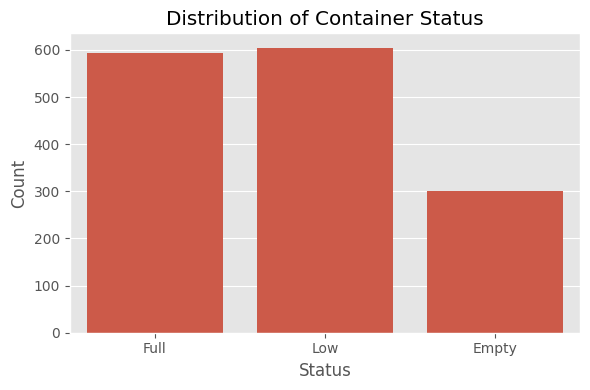

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='status', order=['Full', 'Low', 'Empty'])
plt.title('Distribution of Container Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

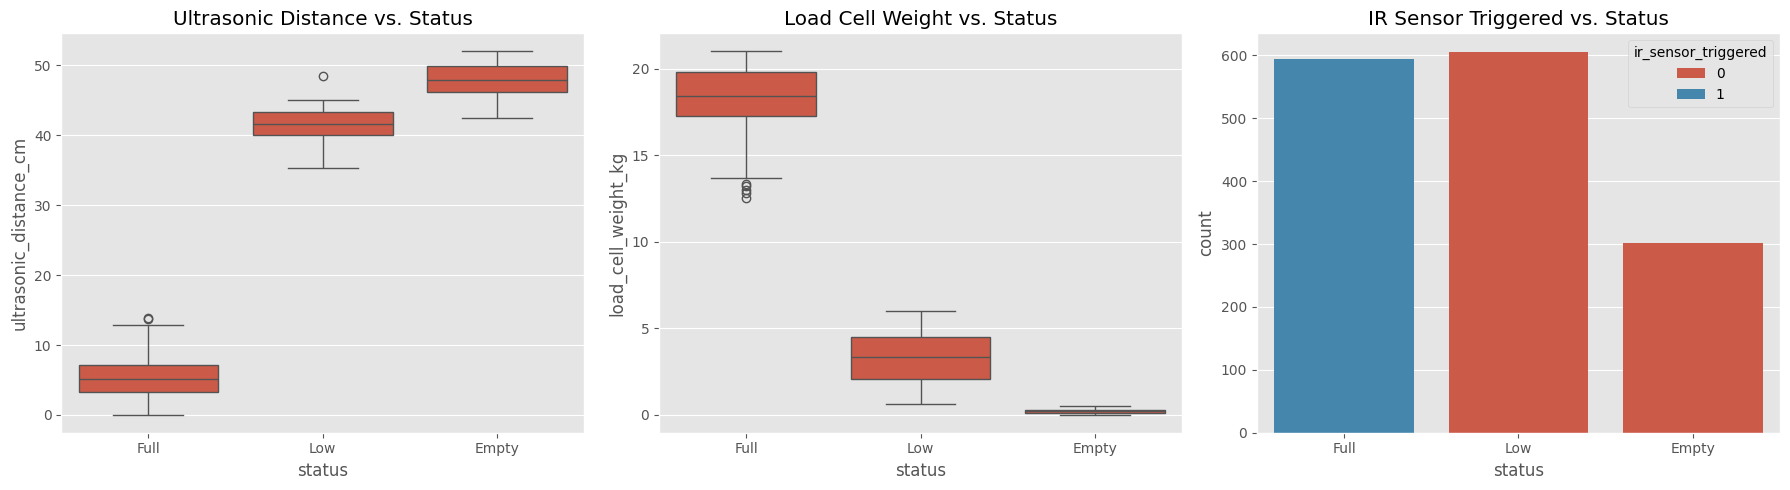

In [9]:
# 2. Sensor Readings vs. Status (Box Plots)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(ax=axes[0], data=df, x='status', y='ultrasonic_distance_cm', order=['Full', 'Low', 'Empty'])
axes[0].set_title('Ultrasonic Distance vs. Status')
sns.boxplot(ax=axes[1], data=df, x='status', y='load_cell_weight_kg', order=['Full', 'Low', 'Empty'])
axes[1].set_title('Load Cell Weight vs. Status')
# IR sensor is binary, countplot is better here
sns.countplot(ax=axes[2], data=df, x='status', hue='ir_sensor_triggered', order=['Full', 'Low', 'Empty'])
axes[2].set_title('IR Sensor Triggered vs. Status')
plt.tight_layout()
plt.show()

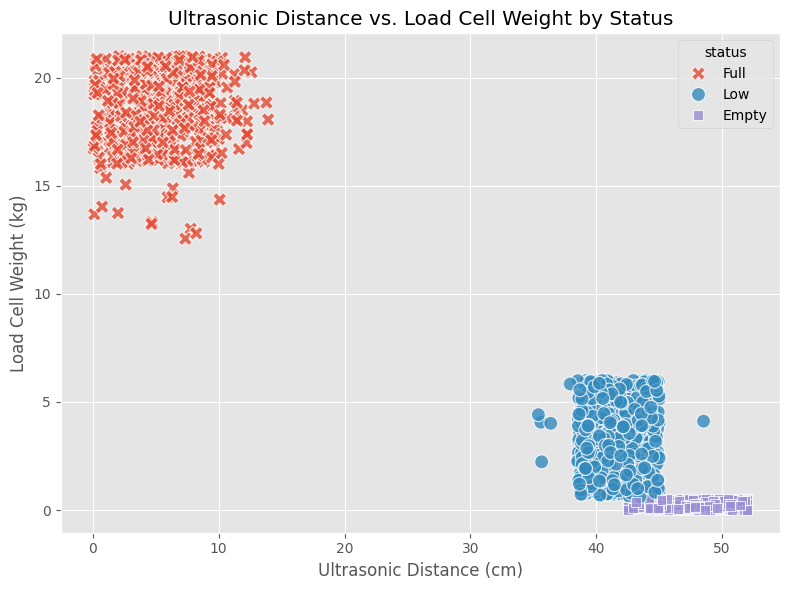

In [10]:
# 3. Scatter Plot: Ultrasonic Distance vs. Weight, colored by Status
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='ultrasonic_distance_cm', y='load_cell_weight_kg', hue='status', style='status', s=100, alpha=0.8, hue_order=['Full', 'Low', 'Empty'])
plt.title('Ultrasonic Distance vs. Load Cell Weight by Status')
plt.xlabel('Ultrasonic Distance (cm)')
plt.ylabel('Load Cell Weight (kg)')
plt.grid(True)
plt.tight_layout()
plt.show()


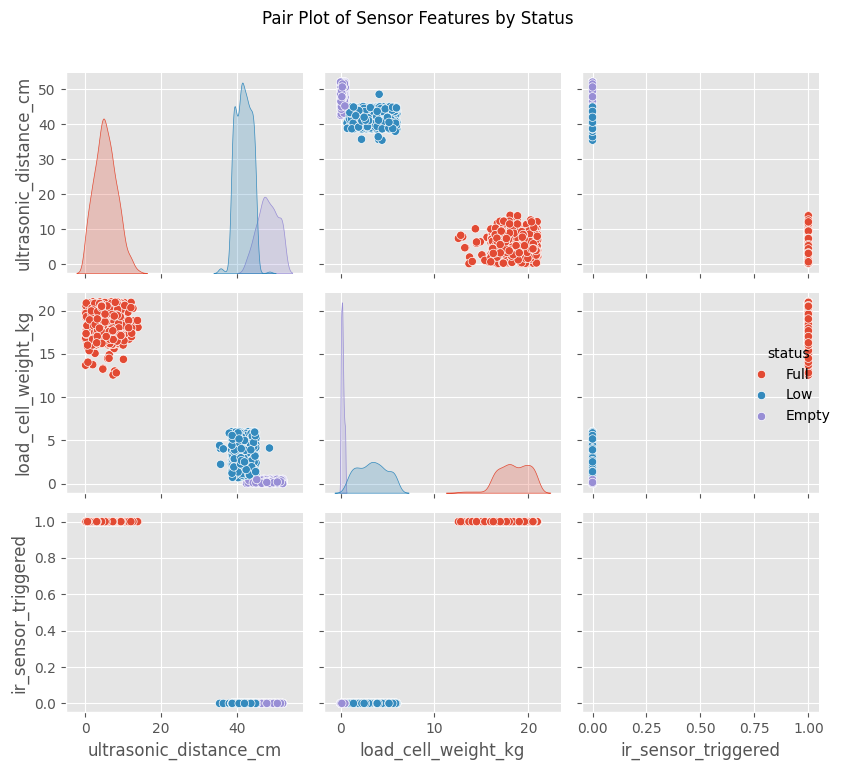

In [11]:
# 4. Pair Plot (shows relationships between all numerical features)
# Note: IR sensor is technically numerical (0/1) but acts like categorical here
sns.pairplot(df, vars=['ultrasonic_distance_cm', 'load_cell_weight_kg', 'ir_sensor_triggered'], hue='status', diag_kind='kde', hue_order=['Full', 'Low', 'Empty'])
plt.suptitle('Pair Plot of Sensor Features by Status', y=1.02)
plt.tight_layout()
plt.show()

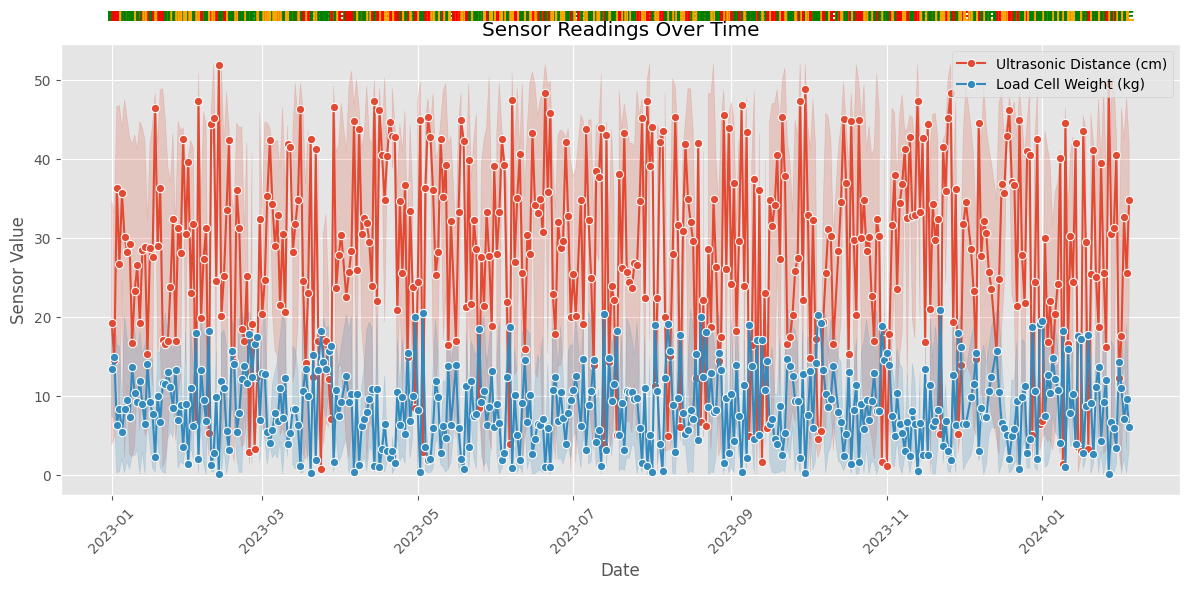

In [12]:
# 5. Sensor Readings Over Time (might be less informative with few dates)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='ultrasonic_distance_cm', marker='o', label='Ultrasonic Distance (cm)')
sns.lineplot(data=df, x='date', y='load_cell_weight_kg', marker='o', label='Load Cell Weight (kg)')
# Add status markers (approximate y-position for clarity)
status_y_pos = df['ultrasonic_distance_cm'].max() * 1.1 # Place markers above lines
for i, row in df.iterrows():
    color = {'Full':'green', 'Low':'orange', 'Empty':'red'}.get(row['status'], 'black')
    plt.text(row['date'], status_y_pos, row['status'][0], color=color, ha='center', va='bottom', fontweight='bold')

plt.title('Sensor Readings Over Time')
plt.ylabel('Sensor Value')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
print("\n--- Preprocessing Data for Model ---")

# Features (X) and Target (y)
# Drop 'date' as it's not a direct input for predicting the *current* status based on *current* sensor readings
X = df[['ultrasonic_distance_cm', 'ir_sensor_triggered', 'load_cell_weight_kg']]
y = df['status']

# Encode the target variable ('Full', 'Low', 'Empty')
le = LabelEncoder()
y_encoded = le.fit_transform(y)


--- Preprocessing Data for Model ---


In [14]:
# Print mapping:
print("Label Encoding Mapping:")
status_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(status_mapping)


Label Encoding Mapping:
{'Empty': np.int64(0), 'Full': np.int64(1), 'Low': np.int64(2)}


In [15]:
# Split data into training and testing sets
# !! WARNING: With only 20 samples, the split is very small and results unreliable !!
# Using test_size=0.3 to get at least a few samples in the test set. Stratify helps.
test_fraction = 0.3 # Using 6 samples for testing
if len(df) * test_fraction < 5: # Ensure at least a few test samples if possible
    test_fraction = 5 / len(df) if len(df) >= 10 else 0.3

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=test_fraction,
    random_state=42, # for reproducibility
    stratify=y_encoded # Keep class proportions in splits
)

print(f"Total samples: {len(df)}")
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Total samples: 1500
Training set size: 1050
Testing set size: 450


In [16]:
# Create a pipeline including scaling and the classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Scale numerical features
    ('classifier', RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced')) # Fewer trees for small data
])

In [17]:
# --- 4. Model Training ---
print("\n--- Training the Model ---")
# !! WARNING: Training on extremely small dataset !!
pipeline.fit(X_train, y_train)
print("Model training complete (trained on limited data).")


# --- 5. Model Evaluation ---
print("\n--- Evaluating the Model ---")
y_pred = pipeline.predict(X_test)


--- Training the Model ---
Model training complete (trained on limited data).

--- Evaluating the Model ---


Model Accuracy on Test Set: 1.0000 (!! Use with caution due to small test set size !!)

Classification Report:
              precision    recall  f1-score   support

       Empty       1.00      1.00      1.00        90
        Full       1.00      1.00      1.00       178
         Low       1.00      1.00      1.00       182

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450


Confusion Matrix:


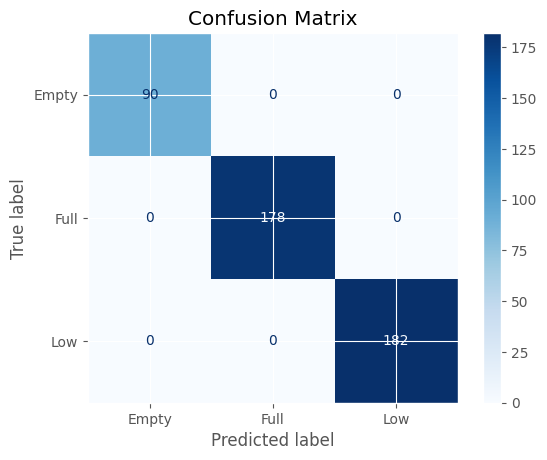

In [18]:
# Decode predictions back to original labels for reporting
y_pred_labels = le.inverse_transform(y_pred)
y_test_labels = le.inverse_transform(y_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy on Test Set: {accuracy:.4f} (!! Use with caution due to small test set size !!)")
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels, labels=le.classes_, zero_division=0)) # Added zero_division=0
print("\nConfusion Matrix:")
# Use ConfusionMatrixDisplay for better visualization
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=le.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [19]:
# --- 6. Save the Model Components ---
# Even though trained on small data, saving demonstrates the process
print("\n--- Saving Model Pipeline and Label Encoder ---")
joblib.dump(pipeline, 'smart_container_model_pipeline_small_data.joblib')
joblib.dump(le, 'label_encoder_small_data.joblib')
print("Model pipeline and encoder saved.")


--- Saving Model Pipeline and Label Encoder ---
Model pipeline and encoder saved.


In [20]:
# --- 7. Real-time Classification & Alerting Simulation ---
print("\n--- Real-time Simulation ---")

# Load the saved pipeline and encoder
loaded_pipeline = joblib.load('smart_container_model_pipeline_small_data.joblib')
loaded_le = joblib.load('label_encoder_small_data.joblib')

# Keep track of the previous status for alert generation
previous_status = None

def classify_and_alert(ultrasonic_reading, ir_reading, weight_reading):
    """
    Classifies container status based on sensor readings and generates alerts.
    Args:
        ultrasonic_reading (float): Distance reading from ultrasonic sensor (cm).
        ir_reading (int): IR sensor state (0 or 1).
        weight_reading (float): Weight reading from load cell (kg).

    Returns:
        tuple: (current_status_label, alert_message or None)
    """
    global previous_status # Use the global variable to track state

    # Create a DataFrame for the single input, matching training columns
    live_data = pd.DataFrame([[ultrasonic_reading, ir_reading, weight_reading]],
                             columns=['ultrasonic_distance_cm', 'ir_sensor_triggered', 'load_cell_weight_kg'])

    # Predict using the loaded pipeline (handles scaling and prediction)
    prediction_encoded = loaded_pipeline.predict(live_data)[0]

    # Decode the prediction back to the original label
    current_status_label = loaded_le.inverse_transform([prediction_encoded])[0]

    alert_message = None
    # Check for status changes and generate alerts
    if previous_status is not None and current_status_label != previous_status:
        print(f"Status Change Detected: {previous_status} -> {current_status_label}") # Debugging print
        if previous_status == 'Full' and current_status_label == 'Low':
            alert_message = "ALERT: Container level is Low. Please schedule a refill."
        elif previous_status in ['Full', 'Low'] and current_status_label == 'Empty':
             alert_message = "CRITICAL ALERT: Container is Empty. Immediate refill required!"
        elif previous_status == 'Empty' and current_status_label == 'Low':
             alert_message = "INFO: Container refilled partially to Low status."
        elif previous_status in ['Empty', 'Low'] and current_status_label == 'Full':
             alert_message = "INFO: Container refilled to Full status."

    # Update the previous status for the next reading
    previous_status = current_status_label

    return current_status_label, alert_message

# --- Simulate receiving new sensor data ---
print("\nSimulating live sensor readings (using loaded model):")

# Reset previous status for simulation run
previous_status = None
print(f"Initial previous_status: {previous_status}")

# Example 1: Data point resembling 'Full' from sample
us_reading1, ir_reading1, wt_reading1 = 5.0, 1, 18.0
status1, alert1 = classify_and_alert(us_reading1, ir_reading1, wt_reading1)
print(f"Reading 1: US={us_reading1}cm, IR={ir_reading1}, WT={wt_reading1}kg -> Status: {status1}")
if alert1: print(f"   -> {alert1}")
print(f"Updated previous_status: {previous_status}\n")


# Example 2: Data point resembling 'Low' from sample
us_reading2, ir_reading2, wt_reading2 = 42.0, 0, 4.5
status2, alert2 = classify_and_alert(us_reading2, ir_reading2, wt_reading2)
print(f"Reading 2: US={us_reading2}cm, IR={ir_reading2}, WT={wt_reading2}kg -> Status: {status2}")
if alert2: print(f"   -> {alert2}")
print(f"Updated previous_status: {previous_status}\n")


# Example 3: Data point resembling 'Empty' from sample
us_reading3, ir_reading3, wt_reading3 = 48.0, 0, 0.3
status3, alert3 = classify_and_alert(us_reading3, ir_reading3, wt_reading3)
print(f"Reading 3: US={us_reading3}cm, IR={ir_reading3}, WT={wt_reading3}kg -> Status: {status3}")
if alert3: print(f"   -> {alert3}")
print(f"Updated previous_status: {previous_status}\n")


# Example 4: Simulating Refill to Full
us_reading4, ir_reading4, wt_reading4 = 3.0, 1, 20.0
status4, alert4 = classify_and_alert(us_reading4, ir_reading4, wt_reading4)
print(f"Reading 4: US={us_reading4}cm, IR={ir_reading4}, WT={wt_reading4}kg -> Status: {status4}")
if alert4: print(f"   -> {alert4}")
print(f"Updated previous_status: {previous_status}\n")

print("\n--- Simulation End ---")
print("\nREMINDER: The model was trained on very limited data (20 samples).")
print("Its predictions and the evaluation metrics should be interpreted with extreme caution.")
print("More data is required for a reliable production model.")


--- Real-time Simulation ---

Simulating live sensor readings (using loaded model):
Initial previous_status: None
Reading 1: US=5.0cm, IR=1, WT=18.0kg -> Status: Full
Updated previous_status: Full

Status Change Detected: Full -> Low
Reading 2: US=42.0cm, IR=0, WT=4.5kg -> Status: Low
   -> ALERT: Container level is Low. Please schedule a refill.
Updated previous_status: Low

Status Change Detected: Low -> Empty
Reading 3: US=48.0cm, IR=0, WT=0.3kg -> Status: Empty
   -> CRITICAL ALERT: Container is Empty. Immediate refill required!
Updated previous_status: Empty

Status Change Detected: Empty -> Full
Reading 4: US=3.0cm, IR=1, WT=20.0kg -> Status: Full
   -> INFO: Container refilled to Full status.
Updated previous_status: Full


--- Simulation End ---

REMINDER: The model was trained on very limited data (20 samples).
Its predictions and the evaluation metrics should be interpreted with extreme caution.
More data is required for a reliable production model.
